# Case Study - Spam Detection

The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP).

We will follow the steps mentioned below:

1. Data Loading
2. Exploratory Data Analysis
3. Data Preparation
    - Train Test Split
    - Data Preprocessing (special characters, stop words, lower case, stemming, etc)
    - Converting text to numerical vector using Bag of Words
    - Preprocessing Test Data
4. Training on Train Data
5. Predictions on Test Data
6. Model Evaluation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [2]:
df = pd.read_csv('data/email_data.csv')

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.shape

(5171, 4)

### Exploratory Data Analysis

In [4]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [5]:
df['label'].value_counts(normalize=True)

ham     0.710114
spam    0.289886
Name: label, dtype: float64

<AxesSubplot:xlabel='label', ylabel='count'>

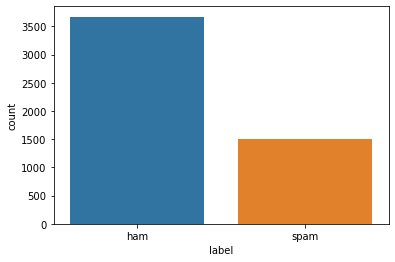

In [6]:
sns.countplot(x='label', data=df)

### Data Preparation

In [7]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [9]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [10]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [11]:
df = df.drop('Unnamed: 0', axis=1)

df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
y = df['label']
X = df[['text']]

In [13]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,text
5132,Subject: april activity surveys\r\nwe are star...
2067,Subject: message subject\r\nhey i ' am julie ^...
4716,Subject: txu fuels / sds nomination for may 20...
4710,Subject: re : richardson volumes nov 99 and de...
2268,Subject: a new era of online medical care .\r\...


In [15]:
X_train.shape

(4136, 1)

In [16]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [17]:
%%timeit

## Convert to series
# X_train['text'].apply(lambda x: preprocess(x, 'stem'))

2min 21s ± 1.89 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
# !pip install tqdm

In [19]:
from tqdm import tqdm, tqdm_notebook

In [20]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas(desc="preprocessing")

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [21]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

preprocessing: 100%|███████████████████████████████████████████████████████████████| 4136/4136 [02:23<00:00, 28.81it/s]


,0,1
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [22]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [23]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36


In [24]:
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

preprocessing: 100%|███████████████████████████████████████████████████████████████| 4136/4136 [02:22<00:00, 29.03it/s]


,0,1
5132,subject april activity survey starting collect...,88
2067,subject message subject hey julie turned high ...,44
4716,subject txu fuel sd nomination may attached ma...,34
4710,subject richardson volume nov dec meter nick s...,105
2268,subject new era online medical care new era on...,36


In [25]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
5132,subject april activity survey starting collect...,88
2067,subject message subject hey julie turned high ...,44
4716,subject txu fuel sd nomination may attached ma...,34
4710,subject richardson volume nov dec meter nick s...,105
2268,subject new era online medical care new era on...,36


In [26]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36


In [27]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36


### Creating the WordCloud for Spam Emails

In [28]:
# !pip install wordcloud

In [29]:
from wordcloud import WordCloud

In [30]:
y_train

5132     ham
2067    spam
4716     ham
4710     ham
2268    spam
        ... 
4426     ham
466      ham
3092    spam
3772     ham
860      ham
Name: label, Length: 4136, dtype: object

In [32]:
spam_df = X_train.loc[y_train=='spam', :]

spam_df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36
4998,Subject: sparkasse security issue\r\nsehr geeh...,subject sparkass secur issu sehr geehrt kundin...,132,subject sparkasse security issue sehr geehrte ...,132
366,Subject: druuugs onliiiiine very cheaaaap\r\nh...,subject druuug onliiiiin cheaaaap hello calvin...,50,subject druuugs onliiiiine cheaaaap hello calv...,50
2683,Subject: survivor junction\r\na genuine colleg...,subject survivor junction genuin colleg degre ...,139,subject survivor junction genuine college degr...,139


In [33]:
words = ' '.join(spam_df['clean_text_lemma'])

print(words[:100])

subject message subject hey julie turned high school senior houston tx waiting long time day finally


In [34]:
spam_df = X_train.loc[y_train=='spam', :]

words = ' '.join(spam_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [35]:
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

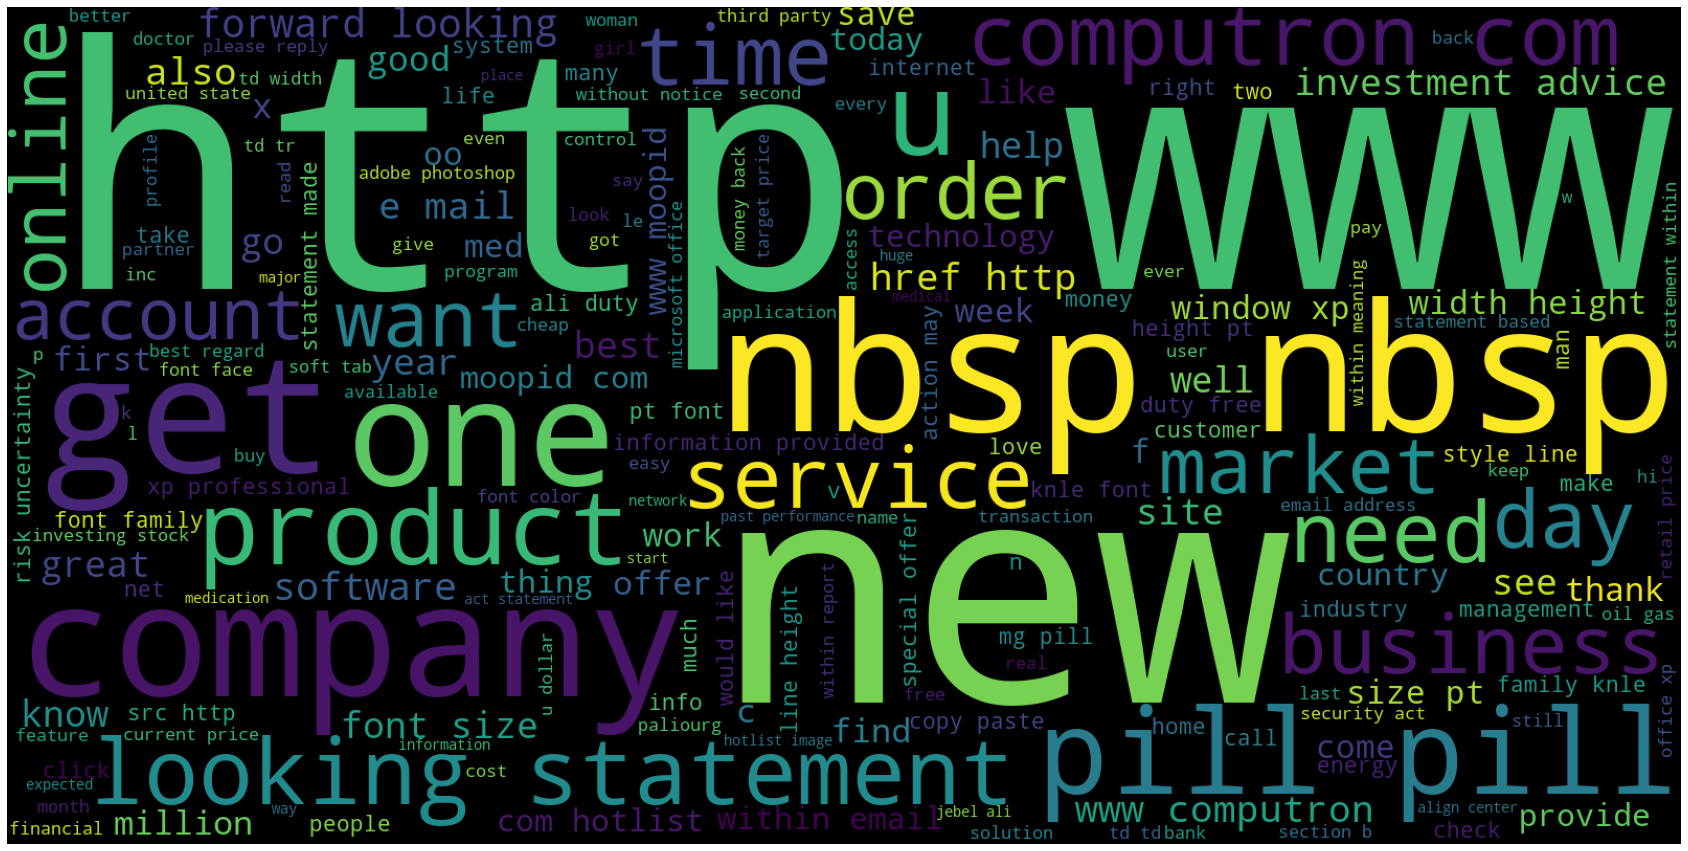

In [36]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

### Text to Numerical transformation

**Step 1** - Learn the vocabulary from the train data  
**Step 2** - Transform the `train['emails']` to `X_train` (i.e. DTM)  
**Step 3** - Transform the `test['emails']` to `X_test` (i.e. DTM)

In [37]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer(ngram_range=[1,2])
vocab.fit(X_train['clean_text_lemma'])

X_train_bow = vocab.transform(X_train['clean_text_lemma'])

In [39]:
X_train_bow

<4136x228713 sparse matrix of type '<class 'numpy.int64'>'
	with 581027 stored elements in Compressed Sparse Row format>

In [40]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 228713
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (4136, 228713)


In [41]:
print(X_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Preprocessing the Test Data

In [42]:
X_test.head()

,text
1566,"Subject: hpl nom for march 30 , 2001\r\n( see ..."
1988,Subject: online pharxmacy 80 % off all meds\r\...
1235,Subject: re : nom / actual volume for april 17...
2868,Subject: re : meter 8740 dec 99\r\nrobert and ...
4903,Subject: re : coastal oil & gas corporation\r\...


In [43]:
temp_df = X_test['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

preprocessing: 100%|███████████████████████████████████████████████████████████████| 1035/1035 [00:38<00:00, 26.63it/s]


,0,1
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [44]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [45]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,text,clean_text_lemma,text_length_lemma
1566,"Subject: hpl nom for march 30 , 2001\r\n( see ...",subject hpl nom march see attached file hplno ...,11
1988,Subject: online pharxmacy 80 % off all meds\r\...,subject online pharxmacy med disscount phafrma...,2590
1235,Subject: re : nom / actual volume for april 17...,subject nom actual volume april th agree eilee...,44
2868,Subject: re : meter 8740 dec 99\r\nrobert and ...,subject meter dec robert put head together dec...,332
4903,Subject: re : coastal oil & gas corporation\r\...,subject coastal oil gas corporation melissa de...,1241


In [46]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

LogisticRegression()

In [48]:
y_test_pred = classifier.predict(X_test_bow)

In [49]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_test_pred))

0.9806763285024155


### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [51]:
y_test_pred = classifier.predict(X_test_bow)

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9555555555555556


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow, y_train)

RandomForestClassifier()

In [54]:
y_test_pred = classifier.predict(X_test_bow)

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9739130434782609
